## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""


In [78]:
import os
import keras

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [140]:
train, test = keras.datasets.cifar10.load_data()
x_train, y_train = train
x_test, y_test = test

In [141]:
from sklearn import preprocessing
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    x = x.astype(float)
    for i in range(len(x)):
        x[i]=x[i].astype(float)
        x[i]=(x[i]-127.5)/127.5
    
    if flatten:
        x = x.reshape(len(x), -1)
        
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y

In [142]:
train, test = keras.datasets.cifar10.load_data()
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [154]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64, 32, 16]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation='relu', name='hidden_layer'+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation='relu', name='hidden_layer'+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation='softmax', name='output')(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp(input_shape=x_train.shape[1:])

model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
hidden_layer6 (Dense)        (None, 16)                528 

In [155]:
x_train.shape[1:]

(3072,)

In [156]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [157]:
y_train.shape

(50000, 10)

In [158]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [159]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Epoch 1/100
196/196 [==============================] - 4s 21ms/step - loss: 1.7683 - accuracy: 0.3749 - val_loss: 1.5851 - val_accuracy: 0.4406
Epoch 2/100
196/196 [==============================] - 4s 20ms/step - loss: 1.5144 - accuracy: 0.4679 - val_loss: 1.4605 - val_accuracy: 0.4912
Epoch 3/100
196/196 [==============================] - 4s 20ms/step - loss: 1.3915 - accuracy: 0.5098 - val_loss: 1.4153 - val_accuracy: 0.5034
Epoch 4/100
196/196 [==============================] - 4s 20ms/step - loss: 1.2931 - accuracy: 0.5444 - val_loss: 1.3588 - val_accuracy: 0.5264
Epoch 5/100
196/196 [==============================] - 4s 20ms/step - loss: 1.2121 - accuracy: 0.5698 - val_loss: 1.3568 - val_accuracy: 0.5271
Epoch 6/100
196/196 [==============================] - 4s 21ms/step - loss: 1.1291 - accuracy: 0.6021 - val_loss: 1.4049 - val_accuracy: 0.5187
Epoch 7/100
196/196 [==============================] - 4s 21ms/step - loss: 1.0585 - accuracy: 0.6256 - val_loss: 1.3745 - val_accuracy:

196/196 [==============================] - 4s 20ms/step - loss: 0.1150 - accuracy: 0.9626 - val_loss: 4.1790 - val_accuracy: 0.5287
Epoch 58/100
196/196 [==============================] - 4s 20ms/step - loss: 0.1141 - accuracy: 0.9620 - val_loss: 3.9254 - val_accuracy: 0.5275
Epoch 59/100
196/196 [==============================] - 4s 20ms/step - loss: 0.0957 - accuracy: 0.9685 - val_loss: 4.0093 - val_accuracy: 0.5263
Epoch 60/100
196/196 [==============================] - 4s 20ms/step - loss: 0.1096 - accuracy: 0.9652 - val_loss: 3.9061 - val_accuracy: 0.5196
Epoch 61/100
196/196 [==============================] - 4s 20ms/step - loss: 0.0978 - accuracy: 0.9678 - val_loss: 4.2033 - val_accuracy: 0.5329
Epoch 62/100
196/196 [==============================] - 4s 20ms/step - loss: 0.0877 - accuracy: 0.9715 - val_loss: 4.1442 - val_accuracy: 0.5277
Epoch 63/100
196/196 [==============================] - 4s 22ms/step - loss: 0.0807 - accuracy: 0.9723 - val_loss: 4.2710 - val_accuracy: 0.519

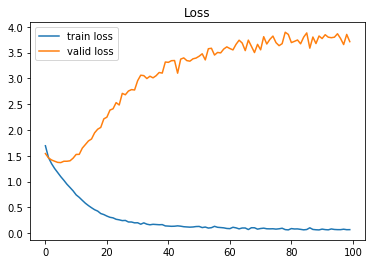

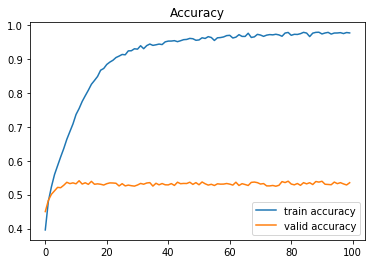

In [12]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

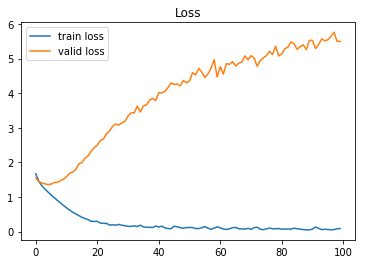

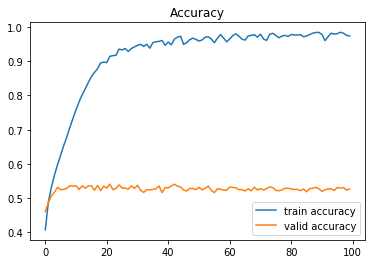

In [150]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

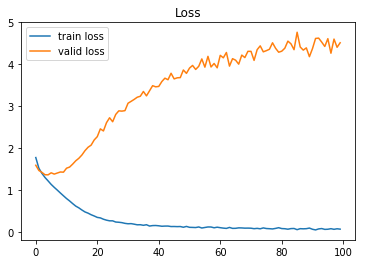

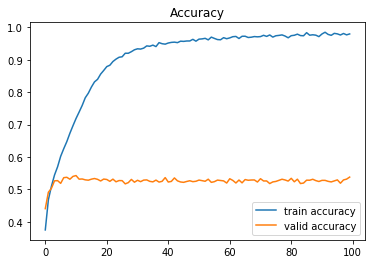

In [161]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()